In [3]:
# import pandas and json
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
# read json file into DataFrame
#df = pd.read_json('./ultimate_data_challenge.json', orient='records')
# turn out that pd.read_json error out due to NaN values in json file

In [5]:
# has to read json file in as below due to NaN values in file
text = open('./ultimate_data_challenge.json','r')
x = text.read()
y = json.loads(x)
print(type(y))
df = pd.DataFrame(y)
df.head(10)

<class 'list'>


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [6]:
# convert dates to datetime objects
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
print(df.columns)
print(df.info())

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int6

In [7]:
# value_counts don't show obvious outliers
print(df.avg_rating_by_driver.value_counts(dropna=False))
print(df.avg_rating_of_driver.value_counts(dropna=False))
print(df.city.value_counts(dropna=False))
print(df.phone.value_counts(dropna=False))
print(df.ultimate_black_user.value_counts(dropna=False))

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
NaN      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
2.7        2
3.2        2
2.3        1
Name: avg_rating_by_driver, dtype: int64
5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64
Winterfell        23336
Astapor           16534
King's Landi

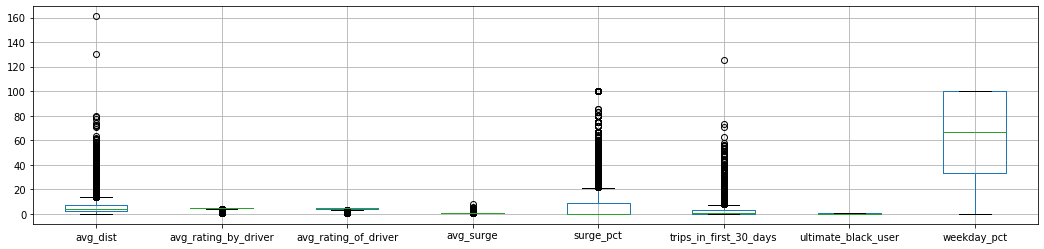

In [8]:
# box plots on numerical variables don't show outliers
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
df.boxplot()

In [9]:
# check last_trip_date and signup_date ranges
print(df.last_trip_date.min())
print(df.last_trip_date.max())
print(df.signup_date.min())
print(df.signup_date.max())

2014-01-01 00:00:00
2014-07-01 00:00:00
2014-01-01 00:00:00
2014-01-31 00:00:00


In [10]:
# generate label for 'retained' drivers, using last_trip_date >= 2014-06-01 as cutoff date
df['retained'] = (df.last_trip_date >= '2014-06-01').astype(int)
#print(df.head())
print(df.retained.value_counts(dropna=False))

0    31196
1    18804
Name: retained, dtype: int64


In [11]:
def crosstab_output(index_col, col = df.retained):
    """ To generate a crosstab table containing normalized fraction for Positive class, and total frequency """
    df_crosstab = pd.DataFrame()
    df_crosstab['normalized'] = pd.crosstab(index_col, col, normalize='index', margins=True).iloc[:, 1]
    df_crosstab['total_frequency'] = pd.crosstab(index_col, col, margins=True).iloc[:, 2]
    
    return df_crosstab

In [12]:
crosstab_output(df.ultimate_black_user)

,normalized,total_frequency
ultimate_black_user,,
False,0.298818,31146
True,0.503713,18854
All,0.376080,50000


In [13]:
crosstab_output(df.phone)

,normalized,total_frequency
phone,,
Android,0.209426,15022
iPhone,0.448933,34582
All,0.376401,49604


In [14]:
crosstab_output(df.city)

,normalized,total_frequency
city,,
Astapor,0.255715,16534
King's Landing,0.628134,10130
Winterfell,0.351945,23336
All,0.376080,50000


In [47]:
import seaborn as sns
def plot_predictor_against_label(df, col_label, cols_predictor):
    """ To plot a list of predictor columns against label column """
    n_plots = len(cols_predictor)
    fig, ax = plt.subplots(n_plots, 1)
    fig.set_size_inches(8, 6*n_plots)
    for i in range(n_plots):
        plt.subplot(n_plots, 1, i+1)
        #print(i)
        sns.boxplot(data=df, y=cols_predictor[i], x=col_label)
        #plt.xlabel(col_label)
        #plt.ylabel(cols_predictor[i])

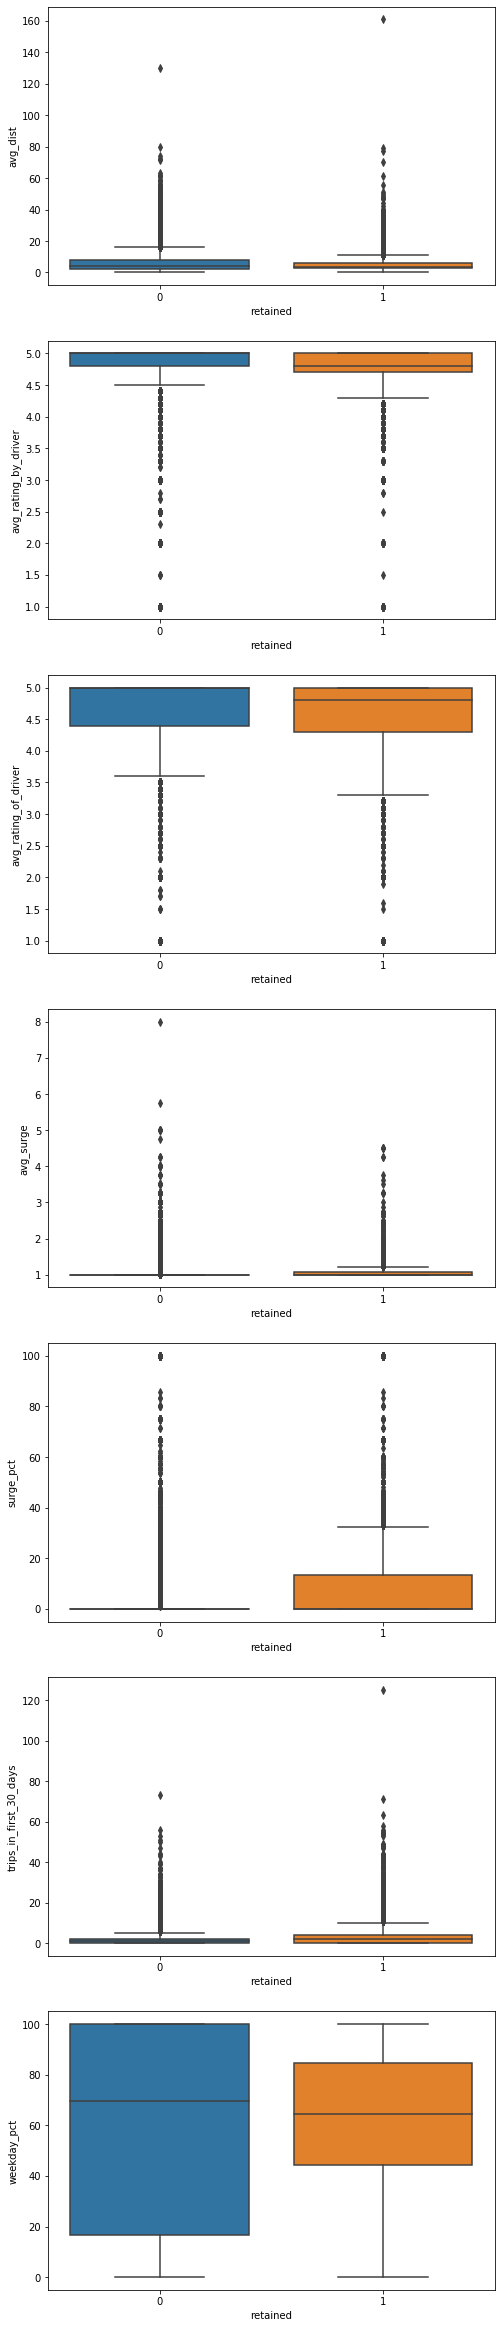

In [49]:
label = 'retained'
predictors = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
plot_predictor_against_label(df, label, predictors)


In [90]:
# impute missing values.
# impute avg_rating_by_driver and df.avg_rating_of_driver by their respective median ratings
# impute phone by 'Unknown'
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.median())
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.median())
df.phone = df.phone.fillna('Unknown')
print(df.info())

5.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB
None


In [91]:
crosstab_output(df.phone)

,normalized,total_frequency
phone,,
Android,0.209426,15022
Unknown,0.335859,396
iPhone,0.448933,34582
All,0.376080,50000


In [93]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.externals import joblib     # for saving the model for future use

In [94]:
y = df.retained
X = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'phone', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']]

In [97]:
# handle categorical variables
X = pd.get_dummies(X)
X.ultimate_black_user = X.ultimate_black_user.astype(int)

In [112]:
print(X.columns)
print(X.head())

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_Unknown', 'phone_iPhone'],
      dtype='object')
   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  surge_pct  \
0      3.67                   5.0                   4.7       1.10       15.4   
1      8.26                   5.0                   5.0       1.00        0.0   
2      0.77                   5.0                   4.3       1.00        0.0   
3      2.36                   4.9                   4.6       1.14       20.0   
4      3.13                   4.9                   4.4       1.19       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  city_Astapor  \
0                       4                    1         46.2             0   
1                       0                    0    

In [99]:
# split 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 19)

In [100]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("ROC_AUC: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [101]:
# create instances of random forest classifier
rf_clf = RandomForestClassifier()

In [102]:
# define parameter distribution for random forest
param_dist_rf = {"n_estimators": sp_randint(100, 501),
                 "max_depth": sp_randint(1, 20),
                 "max_features": sp_randint(1, 15),
                 "min_samples_split": sp_randint(2, 41)
                }

In [103]:
n_iter_search_rf = 300
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf,
                                   n_iter=n_iter_search_rf, cv=5, iid=False, scoring='roc_auc', n_jobs=-1)

start = time()
random_search_rf.fit(X_train, y_train)
print("Decision Tree RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search_rf))
report(random_search_rf.cv_results_)

Decision Tree RandomizedSearchCV took 5020.02 seconds for 300 candidates parameter settings.
Model with rank: 1
ROC_AUC: 0.851 (std: 0.004)
Parameters: {'max_depth': 13, 'max_features': 3, 'min_samples_split': 31, 'n_estimators': 167}

Model with rank: 2
ROC_AUC: 0.851 (std: 0.004)
Parameters: {'max_depth': 11, 'max_features': 6, 'min_samples_split': 31, 'n_estimators': 325}

Model with rank: 3
ROC_AUC: 0.851 (std: 0.004)
Parameters: {'max_depth': 11, 'max_features': 6, 'min_samples_split': 24, 'n_estimators': 222}



In [104]:
# calculate roc_auc on setaside test data using best Random Forest model
auc_rf = roc_auc_score(y_test, random_search_rf.best_estimator_.predict_proba(X_test)[:,1])
print('Random Forest ROC_AUC score on test data: ', auc_rf)

Random Forest ROC_AUC score on test data:  0.8561575797042482


In [109]:
# save models to files
rf_filename = 'finalized_random_forest_model_for_Ultimate.sav'
joblib.dump(random_search_rf, rf_filename)

['finalized_random_forest_model_for_Ultimate.sav']

In [105]:
fpr, tpr, thresholds = roc_curve_test = roc_curve(y_test, random_search_rf.best_estimator_.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99808123 0.99840102 1.        ]
[0.00000000e+00 2.66951415e-04 2.37586759e-02 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.98701209 0.98701209 0.96361828 ... 0.01155701 0.01132218 0.00743276]


Text(0.5, 1.0, 'ROC curve on test data')

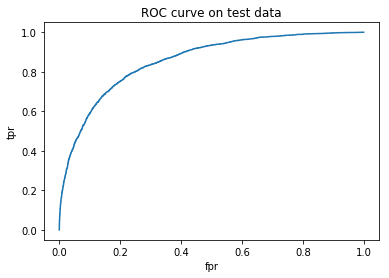

In [118]:
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve on test data')

In [111]:
confusion_matrix(y_test, random_search_rf.best_estimator_.predict(X_test))

array([[5413,  841],
       [1261, 2485]], dtype=int64)

Text(0.5, 1.0, 'Random Forest Feature Importance Plot')

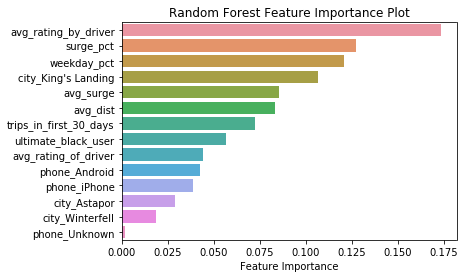

In [108]:
# for Random Forest, plot most important features
import seaborn as sns

rf_feature_importance = dict(zip(X.columns, random_search_rf.best_estimator_.feature_importances_))
rf_sorted_feature_importance = sorted(rf_feature_importance.items(), key=lambda kv: kv[1], reverse=True)
x_plot_rf = list(zip(*rf_sorted_feature_importance))[0]
y_plot_rf = list(zip(*rf_sorted_feature_importance))[1]
sns.barplot(y=list(x_plot_rf), x=list(y_plot_rf), orient='h')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance Plot')